# Información previa

## Diseño y esquema codigo

1. Exploracion de los datos
    1. Segmentar los datos por los cluster de clientes
        - **Estudio de los comportamientos de demanda de cada cluster generico:**
        
        Plantear curvas de comportamiento de compra de cada cliente para cada cluster de clientes, de esta forma se visualizara si los clientes poseen estacionalidades similares a lo que respecta a las compras.

        - curvas etacionales de los precios de compra de cada cliente, para cada cluster de clientes
2. Creación de atributos
    1. Stock
        - Ajustar hora y valores 
    2. Demanda
        - Definir valores.
        - Ajustar por medio del groupby, para que sea de cada cluster.
        - 
        

## Temas a considerar de los datos

### Data Cluster

Los segmentos según lo analisado coinciden en las siguientes caracteristicas

![title](img/Segmento_de_clientes.png)

Los segmentos más llamativos a nivel demanda son **el 4 y el 2**

* **Segmento 2 MAYORISTA**
* **Segmento 4 FRECUENTES**

# Package Install & Open Data


## Import

In [1]:
def Df_ubic(data_X,col,Str):
    df=data_X.copy()
    df=df[df[col]==Str]
    return df

In [2]:
# =============================================================================
# Importar paquetes y abrir Data
# =============================================================================

#gestion DF
import pandas as pd

#Funciones mat y matricicales
import numpy as np

#ploteo simple
import matplotlib.pyplot as plt

# Graficas bonitas
from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

#mode function
import statistics 


In [3]:
import random

##  Data Facturación

In [12]:
# =============================================================================
# Ajuste de los datos
# =============================================================================

col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [13]:
Data.head(1)

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
0,1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Alarcon Basabe Horacio Jesus,3200138357,9,39.2019,26.09.2019,JU,41,105.664,2.600


In [16]:
col='Oficina de Ventas Unifica'
Str='Temuco'
Data=Df_ubic(Data,col,Str)

### Ajuste facturaciones

In [17]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [18]:
data=Ajuste_data(Data)
#data=<data[data['Año']>2018]

### Exploración

In [19]:
data.dtypes

Material                       object
Tipo de cliente                object
Zona de ventas                 object
Zona de ventas.1               object
Oficina de Ventas Unifica      object
Oficina de Ventas Unifica.1    object
Zona de reparto                object
Subtipo de cliente             object
Cluster                        object
Cliente - Local                object
Cliente - Local.1              object
Mes                            object
Año natural/Semana             object
Día natural                    object
Día de la semana               object
Kilos Venta KG                  int64
Venta Neta CLP                  int64
Precio Promedio CLP             int64
Semana                          int64
Año                             int64
dtype: object

In [20]:
data.head(3)

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021


In [21]:
data['Año'].unique()

array([2021, 2020, 2019, 2018, 2017], dtype=int64)

In [22]:
#data[data['Precio Promedio CLP']>=2018]

##  Data Clientes

In [23]:
Cluster = pd.read_csv("Data/Cluster_clientes.csv",
                          encoding="utf-8",sep=";",dtype={'Cliente - Local.1': 'str'})

### Exploración Clientes

In [24]:
Cluster.head(4)

,Cliente - Local.1,Oficina de Ventas Unifica,Subtipo de cliente,Cluster BW,Frecuencia mes promedio,Delta dia promedio,Skew Delta dia,Kilos Venta promedio,Covarianza del lote,Precio Pond CLP \n Tipo de Semana 4,...,Precio Pond CLP \n Tipo de Semana 1,Kilos Venta KG promedio \n Tipo de Semana 1,Precio Pond CLP \n Tipo de Semana 0,Kilos Venta KG promedio \n Tipo de Semana 0,Tipo de Semana 4,Tipo de Semana 3,Tipo de Semana 2,Tipo de Semana 1,Tipo de Semana 0,identified_clusters
0,3200104287,T105,Espec. en Crudos,Sin asignar,0.666667,6.400000,0.316963,31.500000,0.344704,4046.756778,...,4273.210526,28.500000,3820.303030,33.000000,1.750000,1.750000,1.750000,2.000000,1.500000,1
1,3200154991,T105,Espec. en Crudos,Clásico,0.846154,30.000000,1.997698,31.466667,0.370196,4348.960871,...,4287.885255,33.333333,4056.982432,34.000000,2.584127,2.800000,2.584127,2.666667,2.285714,0
2,3200153241,T105,Espec. en Crudos,Clásico,0.388889,78.428571,0.574171,22.500000,0.416926,5405.993216,...,4753.356789,19.666667,3867.449102,27.333333,3.000000,2.333333,1.000000,2.000000,1.666667,0
3,46142,T105,Espec. en Crudos,Clásico,0.941176,27.500000,2.601058,46.285714,0.755745,4350.825950,...,3431.299045,86.333333,4043.008392,43.466667,1.783333,2.000000,2.000000,1.000000,2.133333,1


#### Ploteo de la frecuencia de compra

## Incluir Columna Cluster(Segmento de cliente)

In [25]:
DF_ventas=pd.merge(Cluster[['Cliente - Local.1','identified_clusters']] , data  
     , how='right')

In [26]:
DF_ventas.tail(3)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
3870,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,10,42.2020,2020-10-13,MA,40,187863,4750,42,2020
3871,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,50.2019,2019-12-10,MA,37,99308,2692,50,2019
3872,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,49.2020,2020-12-01,MA,20,87176,4450,49,2020


# Estudio sobre los Segmentos 

Grafica de  dispersion de la demanda de cada cliente 

## Analisis sobre Segemento FRECUENTE 

In [27]:
# GEnero el DF
Cluster_df_vol=DF_ventas[DF_ventas['identified_clusters']==4]

In [28]:
Cluster_df_vol.shape

(156, 21)

In [29]:
Cluster_df_vol.columns

Index(['Cliente - Local.1', 'identified_clusters', 'Material',
       'Tipo de cliente', 'Zona de ventas', 'Zona de ventas.1',
       'Oficina de Ventas Unifica', 'Oficina de Ventas Unifica.1',
       'Zona de reparto', 'Subtipo de cliente', 'Cluster', 'Cliente - Local',
       'Mes', 'Año natural/Semana', 'Día natural', 'Día de la semana',
       'Kilos Venta KG', 'Venta Neta CLP', 'Precio Promedio CLP', 'Semana',
       'Año'],
      dtype='object')

In [30]:
Cluster_df_vol.head(1)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
156,91042,4.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580008,Multiespecialista,...,Supermercados La Estrella Limitada,2,08.2017,2017-02-21,MA,14,52248,3724,8,2017


In [31]:
Clientes_del_cluster=Cluster_df_vol['Cliente - Local.1'].unique()
Clientes_del_cluster

array(['91042', '3200122849', '90811', '3200080994', '67425', '79603',
       '58500', '3200056186', '89617', '3200121340', '2317', '3857',
       '3200149812'], dtype=object)

In [32]:
Cluster_df_vol=Cluster_df_vol[Cluster_df_vol['Año']>2018]

### Graficas

In [33]:
#'#008000'
rand_color= '#00'+str( random. randint(1000,8000))
rand_color

'#005033'

In [34]:
270/12

22.5

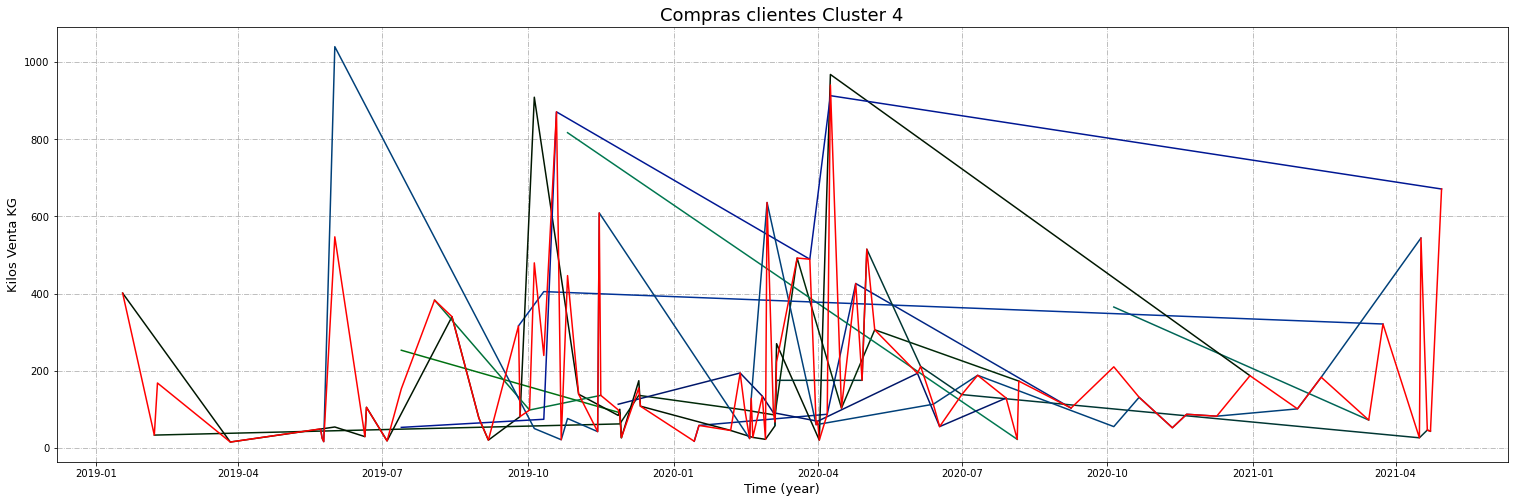

In [35]:
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día natural'
# sketch in data

for i in Clientes_del_cluster:
    df_C=Cluster_df_vol[Cluster_df_vol['Cliente - Local.1']==i].reset_index()
    df_C.sort_values(by=[x], inplace=True)
    rand_color= '#00'+str( random. randint(1000,8000))
    plt.plot(df_C[x], df_C[y], color=rand_color)
    
df_C=Cluster_df_vol.groupby(x).mean()[y].reset_index()
plt.plot(df_C[x], df_C[y], 'r')

# set title & labels
plt.title(('Compras clientes Cluster '+'4'), fontsize=18)
plt.ylabel(y, fontsize=13)
plt.xlabel('Time (year)', fontsize=13)

# display graph
plt.show()

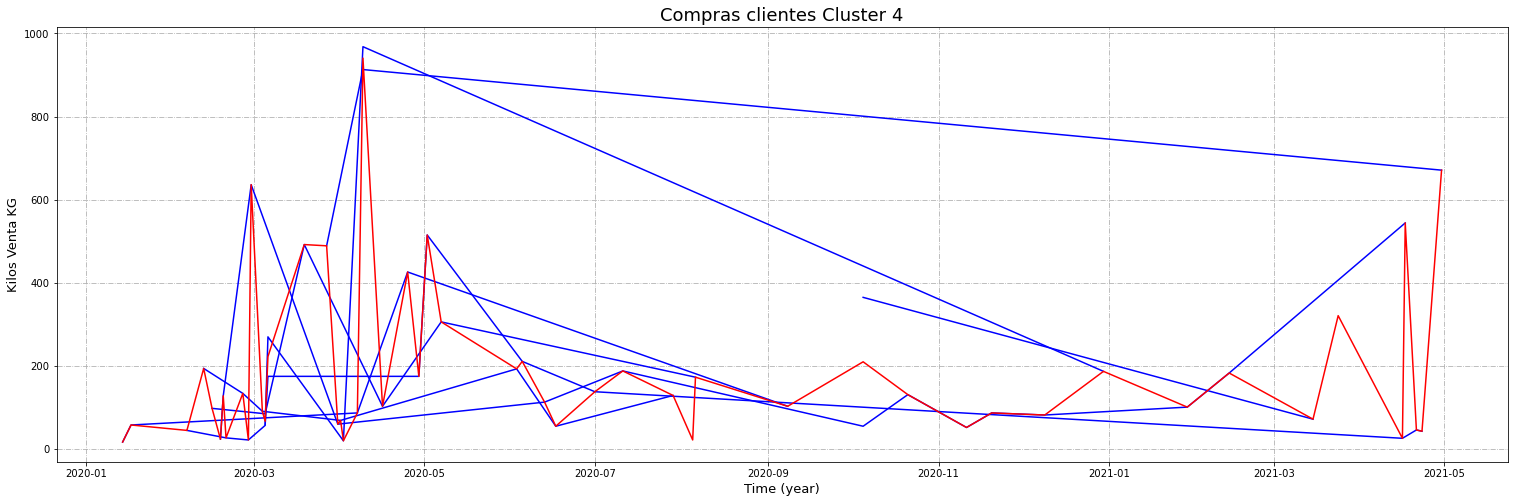

In [36]:
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día natural'
CDf=Cluster_df_vol[Cluster_df_vol[x]>datetime.date(2019, 12, 31)]
# sketch in data

for i in Clientes_del_cluster:
    df_C=CDf[CDf['Cliente - Local.1']==i].reset_index()
    df_C.sort_values(by=[x], inplace=True)
    plt.plot(df_C[x], df_C[y], 'b')
    
df_C=CDf.groupby(x).mean()[y].reset_index()
plt.plot(df_C[x], df_C[y], 'r')

# set title & labels
plt.title(('Compras clientes Cluster '+'4'), fontsize=18)
plt.ylabel(y, fontsize=13)
plt.xlabel('Time (year)', fontsize=13)

# display graph
plt.show()

In [37]:
df_C.columns

Index(['Día natural', 'Kilos Venta KG'], dtype='object')

In [38]:

df_C.head(1)

,Día natural,Kilos Venta KG
0,2020-01-14,17.0


### Por dia de la semana

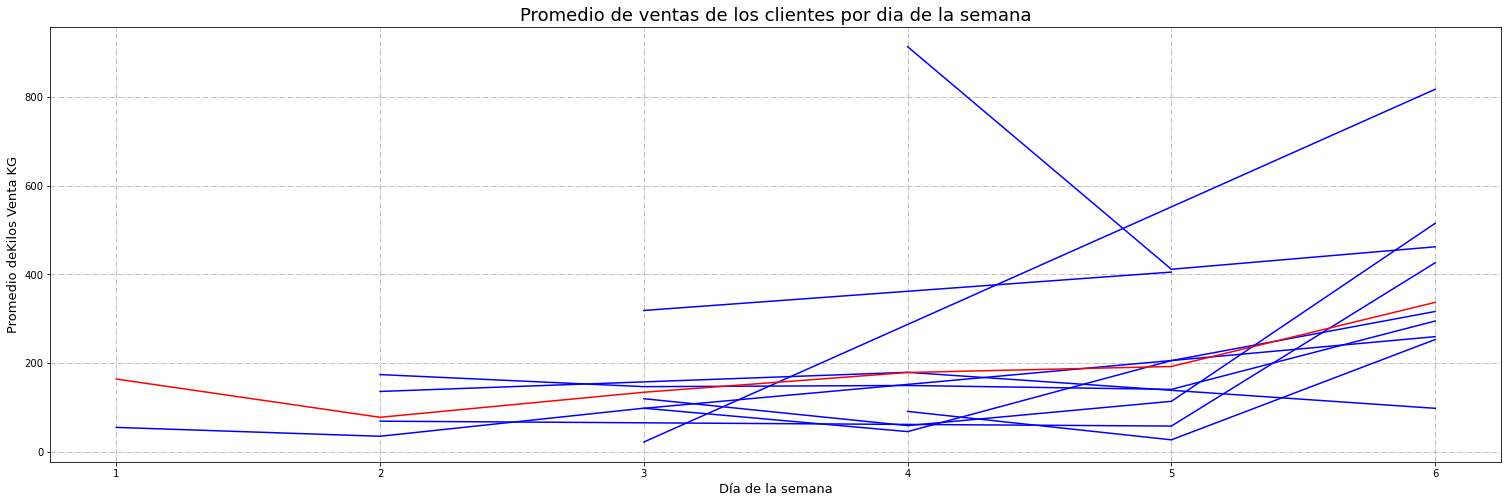

In [39]:
D_Sem={'JU':4, 'LU':1, 'VI':5, 'MA':2, 'MI':3, 'SA':6,'DO':7}
def change_sem(x):
        x=D_Sem[x]
        return x
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día de la semana'
# sketch in data


for i in Clientes_del_cluster:
    df_C=Cluster_df_vol[Cluster_df_vol['Cliente - Local.1']==i].reset_index()
    df_C[x]=df_C[x].apply(change_sem)
    df_C=df_C.groupby(x).mean()[y].reset_index()
    df_C.sort_values(by=[x], inplace=True)
    plt.plot(df_C[x], df_C[y], 'b')


df_C=Cluster_df_vol.groupby(x).mean()[y].reset_index()
df_C[x]=df_C[x].apply(change_sem)
df_C.sort_values(by=[x], inplace=True)
plt.plot(df_C[x], df_C[y], 'r')

# set title & labels
plt.title('Promedio de ventas de los clientes por dia de la semana', fontsize=18)
plt.ylabel('Promedio de' + y, fontsize=13)
plt.xlabel(x, fontsize=13)

# display graph
plt.show()

#### Lote compra promedio Dia semana

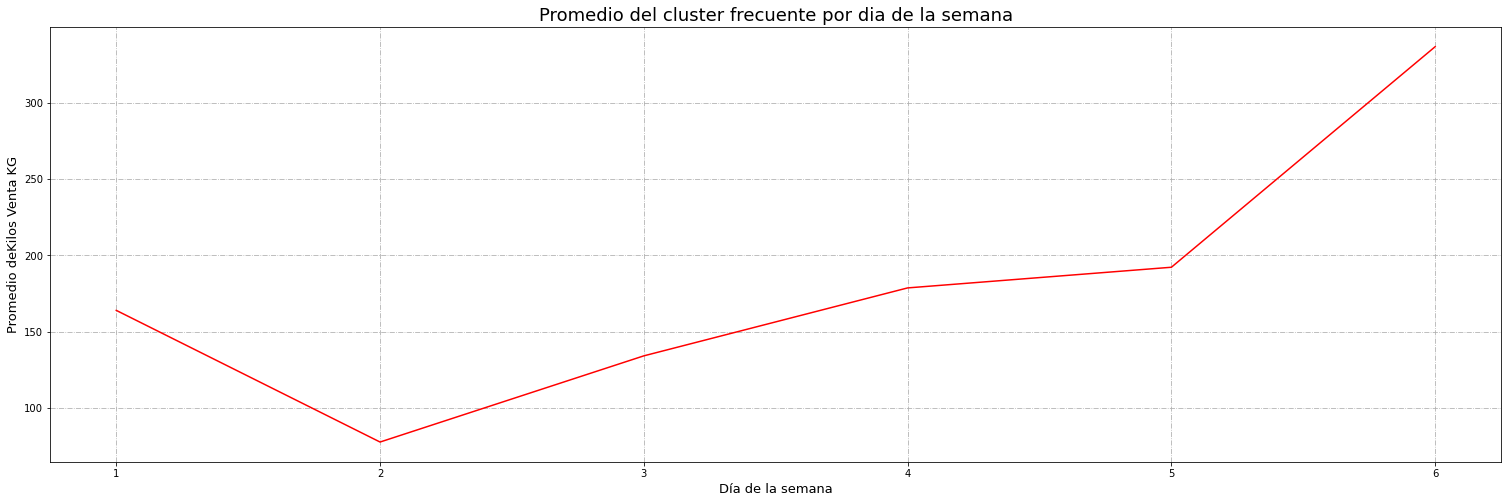

In [40]:
D_Sem={'JU':4, 'LU':1, 'VI':5, 'MA':2, 'MI':3, 'SA':6,'DO':7}
def change_sem(x):
        x=D_Sem[x]
        return x
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día de la semana'
# sketch in data

"""
for i in Clientes_del_cluster:
    df_C=Cluster_df_vol[Cluster_df_vol['Cliente - Local.1']==i].reset_index()
    df_C[x]=df_C[x].apply(change_sem)
    df_C=df_C.groupby(x).mean()[y].reset_index()
    df_C.sort_values(by=[x], inplace=True)
    plt.plot(df_C[x], df_C[y], 'b')
"""
df_C=Cluster_df_vol.groupby(x).mean()[y].reset_index()
df_C[x]=df_C[x].apply(change_sem)
df_C.sort_values(by=[x], inplace=True)
plt.plot(df_C[x], df_C[y], 'r')

# set title & labels
plt.title('Promedio del cluster '+'frecuente'+' por dia de la semana', fontsize=18)
plt.ylabel('Promedio de' + y, fontsize=13)
plt.xlabel(x, fontsize=13)

# display graph
plt.show()

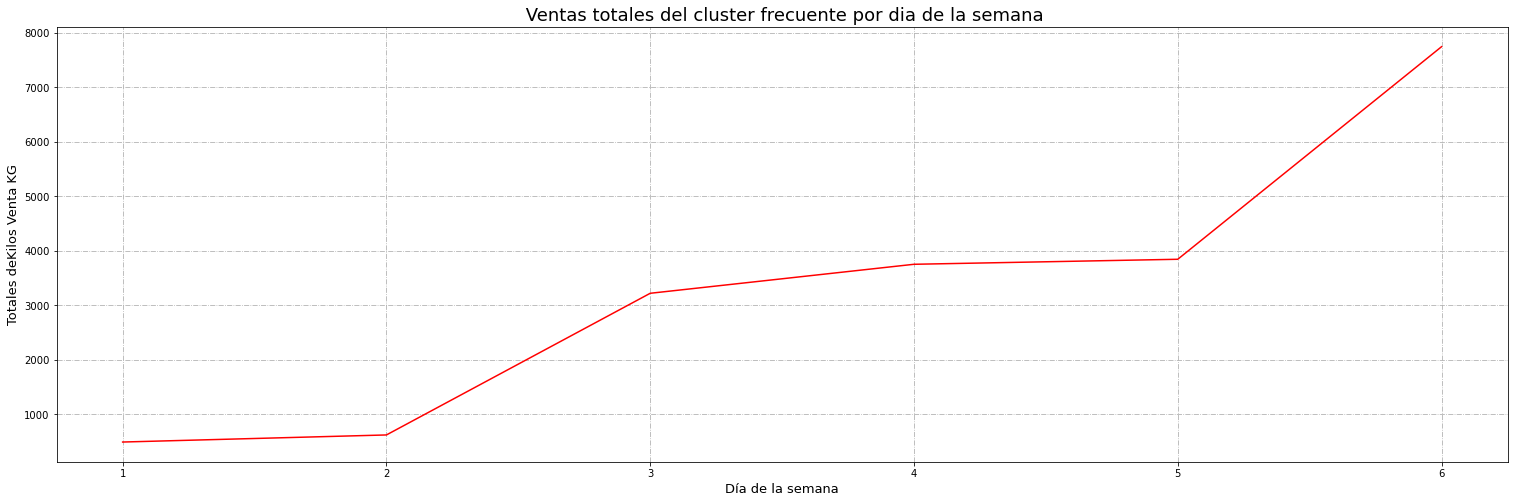

In [41]:
D_Sem={'JU':4, 'LU':1, 'VI':5, 'MA':2, 'MI':3, 'SA':6,'DO':7}
def change_sem(x):
        x=D_Sem[x]
        return x
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día de la semana'
# sketch in data

"""
for i in Clientes_del_cluster:
    df_C=Cluster_df_vol[Cluster_df_vol['Cliente - Local.1']==i].reset_index()
    df_C[x]=df_C[x].apply(change_sem)
    df_C=df_C.groupby(x).mean()[y].reset_index()
    df_C.sort_values(by=[x], inplace=True)
    plt.plot(df_C[x], df_C[y], 'b')
"""

df_C=Cluster_df_vol.groupby(x).sum()[y].reset_index()
df_C[x]=df_C[x].apply(change_sem)
df_C.sort_values(by=[x], inplace=True)
plt.plot(df_C[x], df_C[y], 'r')

# set title & labels
plt.title(' Ventas totales del cluster '+'frecuente'+' por dia de la semana', fontsize=18)
plt.ylabel('Totales de' + y, fontsize=13)
plt.xlabel(x, fontsize=13)

# display graph
plt.show()

# Stokc

Esta data posee los volumenes de stock de santiago, para el trutro de pollo

## Data

In [42]:
col_names=pd.read_csv("Data/last_down/Stock STGO 1010078.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_stock = pd.read_csv("Data/last_down/Stock STGO 1010078.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/last_down/Stock STGO 1010078.csv'

In [43]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Stock']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        #df[i]=df[i].astype('int64')
        df[i]=df[i].astype('float64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [44]:
Data_stock=Ajuste_data(Data_stock)

NameError: name 'Data_stock' is not defined

In [45]:
Data_stock.tail()

NameError: name 'Data_stock' is not defined

## Stock vs Demanda(Venta)

In [ ]:
#=======================================
# groupby para estimar el volumen de STOCK
#=======================================

G_stock=Data_stock.groupby('Día natural').sum().reset_index()
G_stock.head()

In [ ]:
#=======================================
# groupby para estimar LA DEMANDA TOTAL
#=======================================

G_data=data.groupby('Día natural').sum().reset_index()
G_data.head()

In [ ]:
DF_VS=pd.merge(G_data[['Día natural', 'Kilos Venta KG']] , G_stock[['Día natural', 'Stock']]  
     , how='right')
DF_VS.sort_values(by=['Día natural'], inplace=True)
DF_VS.head()

In [ ]:
# frame up w/ grid
plt.figure(figsize=(26,8))
plt.grid(linestyle='-.')
y='Kilos Venta KG'
x='Día natural'
# sketch in data


plt.plot(DF_VS[x], DF_VS[y], 'b')

plt.plot(DF_VS[x], DF_VS['Stock'], 'r')

# set title & labels
plt.title('Relación demanda Canal Tradicional y volumen de Stock', fontsize=18)
plt.ylabel(y, fontsize=13)
plt.xlabel(x, fontsize=13)

# display graph
plt.show()

Realizar este mismo grafico pero considerando la demanda de cada canal de ventas, para evaluar cuales fueron los pick en ventad del canal tradicional dado la caida de algun otro canal.

# Stock Vida ultil


In [ ]:
fillN='Stock Vida ultil 101078 Z01'
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_stock = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [ ]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Stock']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        #df[i]=df[i].astype('int64')
        df[i]=df[i].astype('float64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [ ]:
Data_stock=Ajuste_data(Data_stock)

In [ ]:
Data_stock['Vida Útil Restante']=Data_stock['Vida Útil Restante'].astype('int64')

### Demanda dia CT 

In [ ]:
G_data=data.groupby('Día natural').sum().reset_index()
G_data.head()

### Merge 

In [ ]:
Data_stock.dtypes

In [ ]:
Data_stock.columns#.head()

#### Vida ultil restante promedio ponderado 

In [ ]:
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante']*Data_stock['Stock']

In [ ]:
G_stock=Data_stock.groupby(['Día natural']).sum().reset_index()
G_stock.head()

In [ ]:
G_stock['Vida Útil Restante Promedio']=G_stock['Vida Útil Restante Promedio']/G_stock['Stock']
G_stock.head()

### Grafica 

In [ ]:
DF_VS=pd.merge(G_data[['Día natural', 'Kilos Venta KG']] , G_stock[['Día natural','Vida Útil Restante Promedio', 'Stock']]  
     , how='right')
DF_VS.sort_values(by=['Día natural'], inplace=True)
DF_VS.head()

In [ ]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [ ]:
GRaph_Disp_cluster=(
    ggplot(DF_VS, aes(x='Día natural',
                               y= 'Stock'))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ))\
                 + geom_point(aes(x='Día natural',
                               y= 'Kilos Venta KG'))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,8))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

#### Analisis simple

In [ ]:
DF_VS[DF_VS.Stock>=300000]['Día natural'].iloc[0]

In [ ]:
Data_stock[Data_stock['Día natural']==
datetime.date(2020, 3, 7)]

In [ ]:
G_data[G_data['Día natural']==
datetime.date(2020, 3, 7)]

In [ ]:
Data_stock[Data_stock['Día natural']==
datetime.date(2020, 3, 6)]

In [ ]:
GRaph_Disp_cluster=(
    ggplot(DF_VS, aes(x='Stock',
                               y= 'Kilos Venta KG' ))\
                + labs(y='Demanda',x='Stock')\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

In [ ]:
(
    ggplot(Data_stock)
    + geom_boxplot(aes(x='Oficina de ventas.1', y='Vida Útil Restante'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
)

In [ ]:
data.columns

In [ ]:
data.head(2)

###  Boxplot Demanda 

In [ ]:
(
    ggplot(data.groupby(['Día natural','Oficina de Ventas Unifica']).sum().reset_index())
    + geom_boxplot(aes(x='Oficina de Ventas Unifica', y='Kilos Venta KG'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
     +theme(axis_text_x = element_text(angle=90, hjust=1)
                      )
)

In [ ]:
(
    ggplot(Cluster_df_vol.groupby(['Día natural','Oficina de Ventas Unifica']).sum().reset_index())
    + geom_boxplot(aes(x='Oficina de Ventas Unifica', y='Kilos Venta KG'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
     +theme(axis_text_x = element_text(angle=90, hjust=1)
                      )
)

# box segmento 

In [46]:
DF_ventas.identified_clusters=DF_ventas.identified_clusters.dtype('int64')

TypeError: 'numpy.dtype[float64]' object is not callable

In [47]:
df_x=DF_ventas.copy()
df_x=df_x.dropna()

In [48]:
 def categoria(x):
        Segmento={'0':'Atractivo','1':'Oportunista','2':'Mayorista','3':'Oportunista menor','4':'Frecuente'}
        x=str(x)
        x=x[0]
        return Segmento[x]#.replace('.', '')
    

df_x['identified_clusters']=df_x['identified_clusters'].apply(categoria)

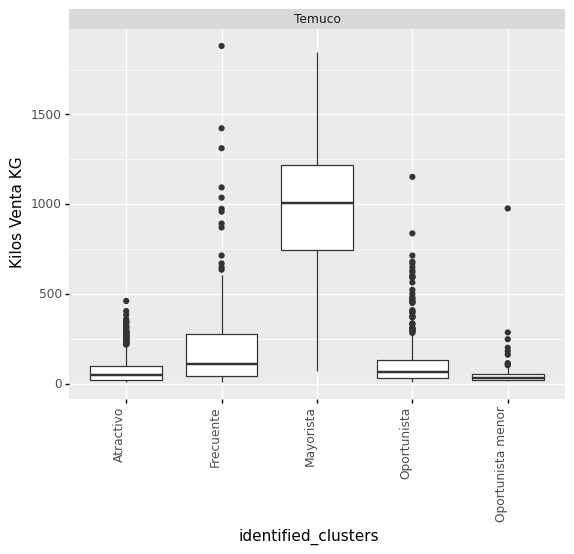

<ggplot: (170204362376)>

In [49]:
(
    ggplot(df_x.groupby(['Día natural','Oficina de Ventas Unifica','identified_clusters']).sum().reset_index())
    + geom_boxplot(aes(x='identified_clusters', y='Kilos Venta KG'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
     +theme(axis_text_x = element_text(angle=90, hjust=1)
                      )
     + facet_grid('.~Oficina de Ventas Unifica')\
)

In [50]:
df_x.groupby(['Día natural','Oficina de Ventas Unifica','identified_clusters']).count()#.reset_index()

Cliente - Local.1  \
Día natural Oficina de Ventas Unifica identified_clusters                      
2017-01-04  Temuco                    Atractivo                            2   
2017-01-05  Temuco                    Oportunista                          1   
2017-01-06  Temuco                    Atractivo                            1   
                                      Oportunista                          2   
2017-01-07  Temuco                    Oportunista                          1   
...                                                                      ...   
2021-05-18  Temuco                    Atractivo                            1   
2021-05-19  Temuco                    Atractivo                            4   
                                      Oportunista                          2   
2021-05-20  Temuco                    Atractivo                            3   
                                      Oportunista                          1   

                                                           Material  \
Día natural Oficina de Ventas Unifica identified_clusters             
2017-01-04  Temuco                    Atractivo                   2   
2017-01-05  Temuco                    Oportunista                 1   
2017-01-06  Temuco                    Atractivo                   1   
                                      Oportunista                 2   
2017-01-07  Temuco                    Oportunista                 1   
...                                                             ...   
2021-05-18  Temuco                    Atractivo                   1   
2021-05-19  Temuco                    Atractivo                   4   
                                      Oportunista                 2   
2021-05-20  Temuco                    Atractivo                   3   
                                      Oportunista                 1   

                                                           Tipo de cliente  \
Día natural Oficina de Ventas Unifica identified_clusters                    
2017-01-04  Temuco                    Atractivo                          2   
2017-01-05  Temuco                    Oportunista                        1   
2017-01-06  Temuco                    Atractivo                          1   
                                      Oportunista                        2   
2017-01-07  Temuco                    Oportunista                        1   
...                                                                    ...   
2021-05-18  Temuco                    Atractivo                          1   
2021-05-19  Temuco                    Atractivo                          4   
                                      Oportunista                        2   
2021-05-20  Temuco                    Atractivo                          3   
                                      Oportunista                        1   

                                                           Zona de ventas  \
Día natural Oficina de Ventas Unifica identified_clusters                   
2017-01-04  Temuco                    Atractivo                         2   
2017-01-05  Temuco                    Oportunista                       1   
2017-01-06  Temuco                    Atractivo                         1   
                                      Oportunista                       2   
2017-01-07  Temuco                    Oportunista                       1   
...                                                                   ...   
2021-05-18  Temuco                    Atractivo                         1   
2021-05-19  Temuco                    Atractivo                         4   
                                      Oportunista                       2   
2021-05-20  Temuco                    Atractivo                         3   
                                      Oportunista                       1   

                                                           Zona de ventas.1  

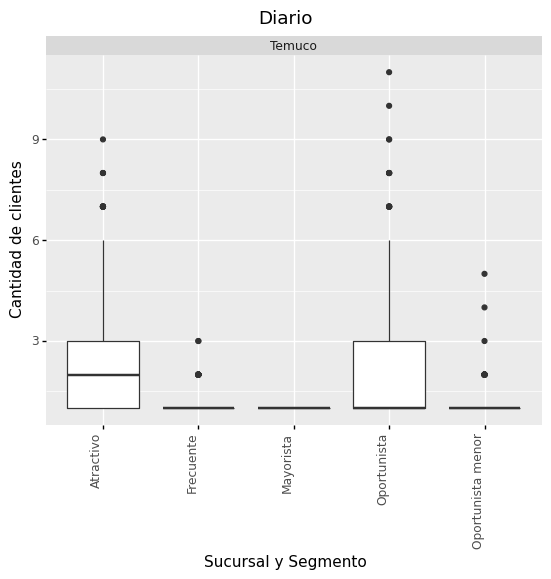

<ggplot: (170206963929)>

In [51]:
(
    ggplot(df_x.groupby(['Día natural','Oficina de Ventas Unifica','identified_clusters']).count().reset_index())
    + geom_boxplot(aes(x='identified_clusters', y='Kilos Venta KG'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
     +theme(axis_text_x = element_text(angle=90, hjust=1)
                      )
     + facet_grid('.~Oficina de Ventas Unifica')\
    +ggtitle('Diario')+ labs(x='Sucursal y Segmento', y='Cantidad de clientes')
)

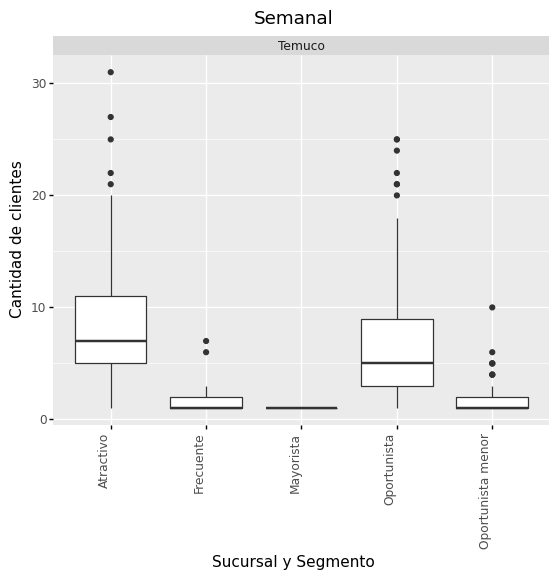

<ggplot: (170207014897)>

In [52]:
(
    ggplot(df_x.groupby(['Año natural/Semana','Oficina de Ventas Unifica','identified_clusters']).count().reset_index())
    + geom_boxplot(aes(x='identified_clusters', y='Kilos Venta KG'))
    #+ scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
     +theme(axis_text_x = element_text(angle=90, hjust=1)
                      )
     + facet_grid('.~Oficina de Ventas Unifica')    
        +ggtitle('Semanal')+ labs(x='Sucursal y Segmento', y='Cantidad de clientes')
)